<h1 style="color:green" align="center"><b> Market Segmentation in SBI life Insurance</b> </h1>

# **1. Overview**

### **Objective :**
This case requires to develop a customer segmentation to give recommendations like saving plans, loans, wealth management, etc. on target customer groups. 
### **Data Description :**
The sample Dataset summarizes the usage behavior of about 9000 active credit card holders during the last 6 months. The file is at a customer level with 18 behavioral variables.

### **Attribute Information :**
Following is the Data Dictionary for customer's credit card dataset :-

<b> CUSTID :</b> Identification of Credit Card holder (Categorical)<br>
<b>BALANCE :</b> Balance amount left in their account to make purchases<br>
<b>BALANCEFREQUENCY :</b> How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)<br>
<b>PURCHASES :</b> Amount of purchases made from account<br>
<b>ONEOFFPURCHASES :</b> Maximum purchase amount done in one-go<br>
<b>INSTALLMENTSPURCHASES :</b> Amount of purchase done in installment<br>
<b>CASHADVANCE :</b> Cash in advance given by the user<br>
<b>PURCHASESFREQUENCY :</b> How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)<br>
<b>ONEOFFPURCHASESFREQUENCY :</b> How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)<br>
PURCHASESINSTALLMENTSFREQUENCY :</b> How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)<br>
<b>CASHADVANCEFREQUENCY :</b> How frequently the cash in advance being paid<br>
<b>CASHADVANCETRX :</b> Number of Transactions made with "Cash in Advanced"<br>
<b>PURCHASESTRX :</b> Numbe of purchase transactions made<br>
<b>CREDITLIMIT :</b> Limit of Credit Card for user<br>
<b>PAYMENTS :</b> Amount of Payment done by user<br>
<b>MINIMUM_PAYMENTS :</b> Minimum amount of payments made by user<br>
<b>PRCFULLPAYMENT :</b> Percent of full payment paid by user<br>
<b>TENURE :</b> Tenure of credit card service for user<br>


# **2. Import Libraries:**

In [1]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans,AgglomerativeClustering,DBSCAN,SpectralClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_samples, silhouette_score

import warnings
warnings.filterwarnings("ignore") 

# **3. Load Dataset:**

In [2]:
# import the dataset
creditcard_df = pd.read_csv("E:\CodeBasic\credit_card_dataset.csv")
creditcard_df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


# **4.Exploratory Data Analysis & Data Cleaning:**

In [3]:
creditcard_df.shape

(8950, 18)

In [4]:
# information about the data
creditcard_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [5]:
# Check the statistics summary of the dataframe
creditcard_df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


# **5.Data Cleaning:**

In [6]:
# checking for Null values in data frame
creditcard_df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [7]:
# find all columns having missing values
missing_var = [var for var in creditcard_df.columns if creditcard_df[var].isnull().sum()>0]
missing_var

['CREDIT_LIMIT', 'MINIMUM_PAYMENTS']

In [8]:
import missingno as msno

<Axes: >

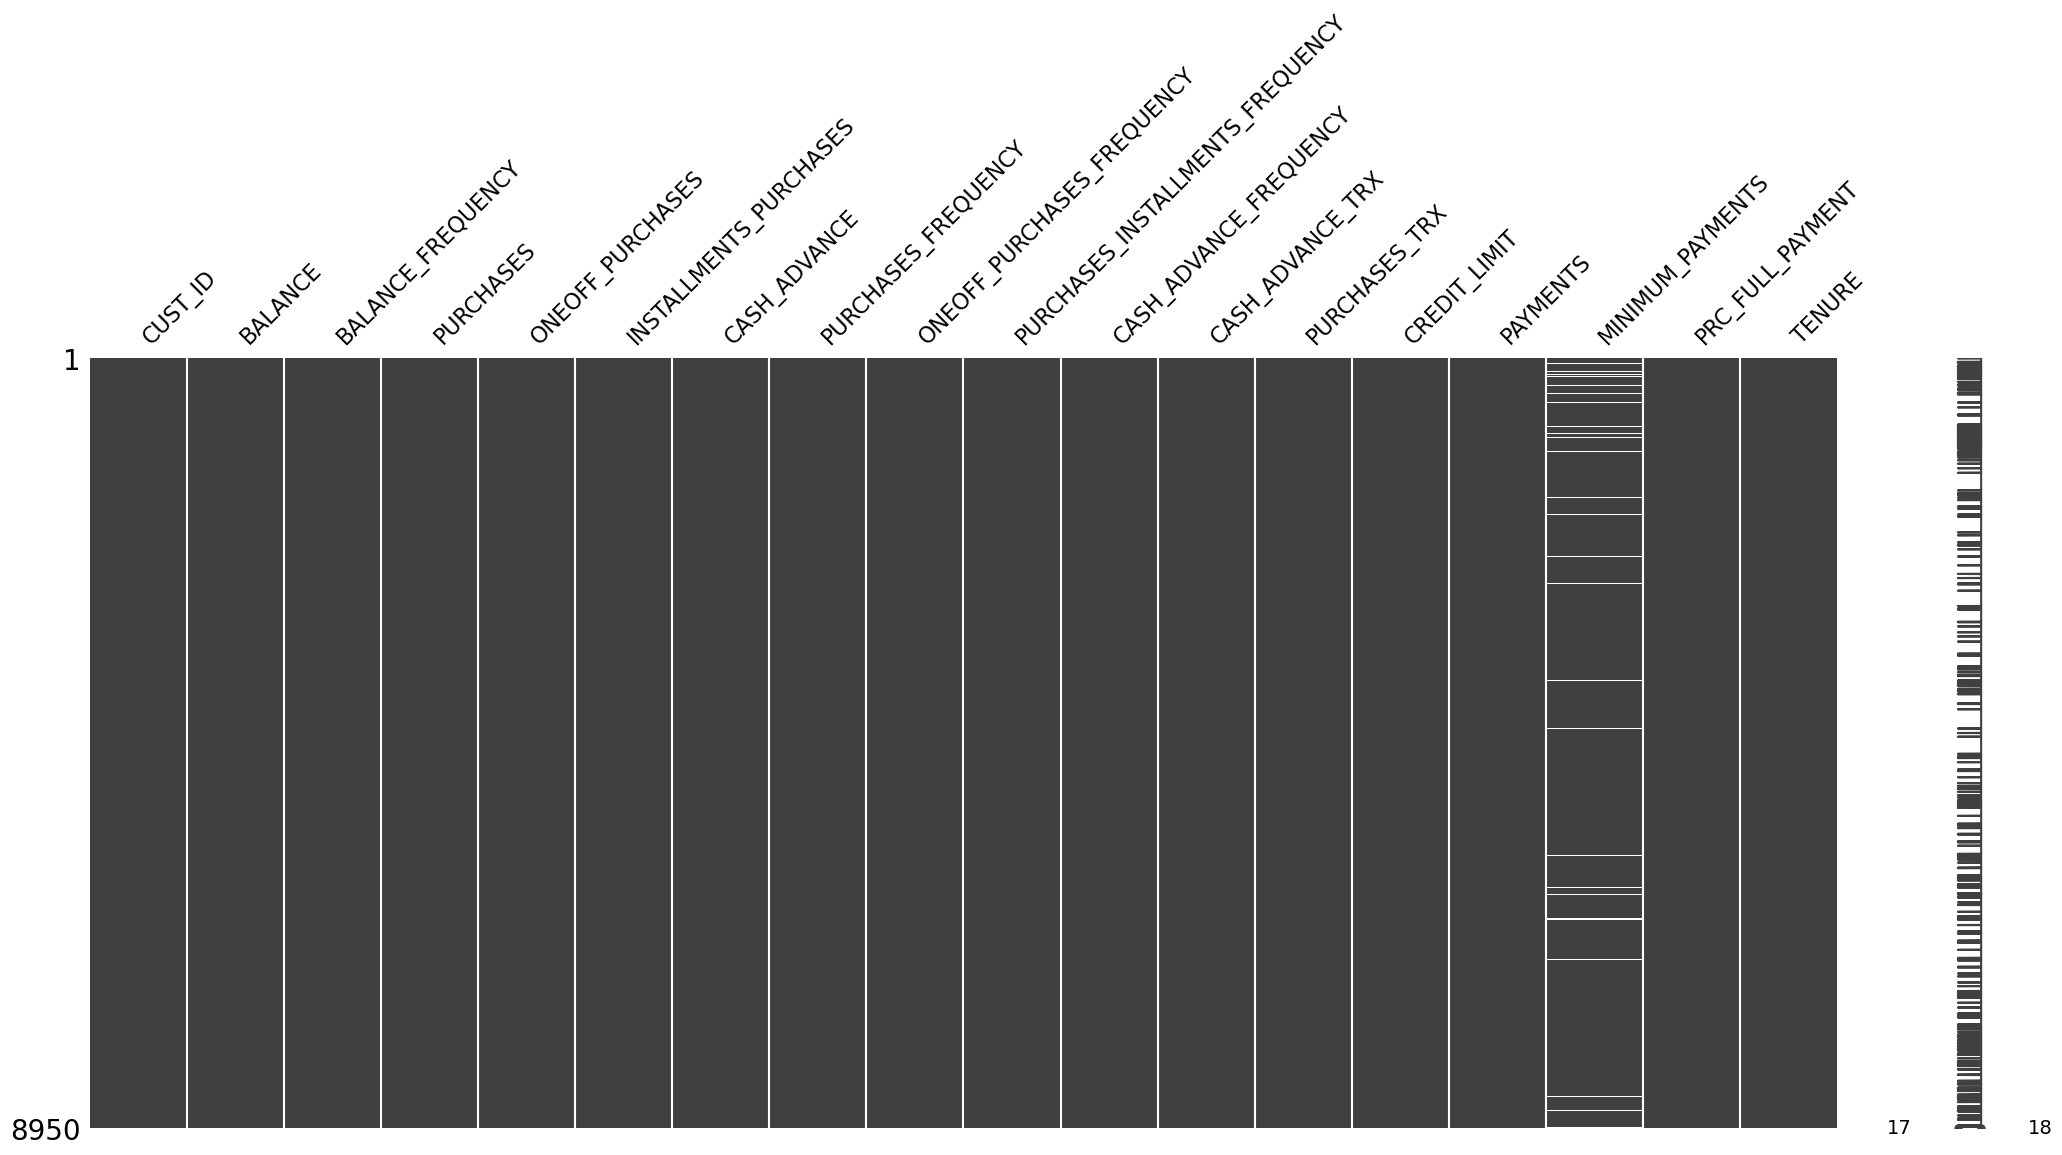

In [9]:
msno.matrix(creditcard_df)

In [10]:
# fill mean value in place of missing values
creditcard_df["MINIMUM_PAYMENTS"] = creditcard_df["MINIMUM_PAYMENTS"].fillna(creditcard_df["MINIMUM_PAYMENTS"].mean())
creditcard_df["CREDIT_LIMIT"] = creditcard_df["CREDIT_LIMIT"].fillna(creditcard_df["CREDIT_LIMIT"].mean())

In [11]:
# Again check for null values
creditcard_df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [12]:
# check duplicate entries in the dataset
creditcard_df.duplicated().sum()

0

In [13]:
# drop unnecessary columns
creditcard_df.drop(columns=["CUST_ID"],axis=1,inplace=True)

In [14]:
creditcard_df.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

In [15]:
creditcard_df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


<Axes: >

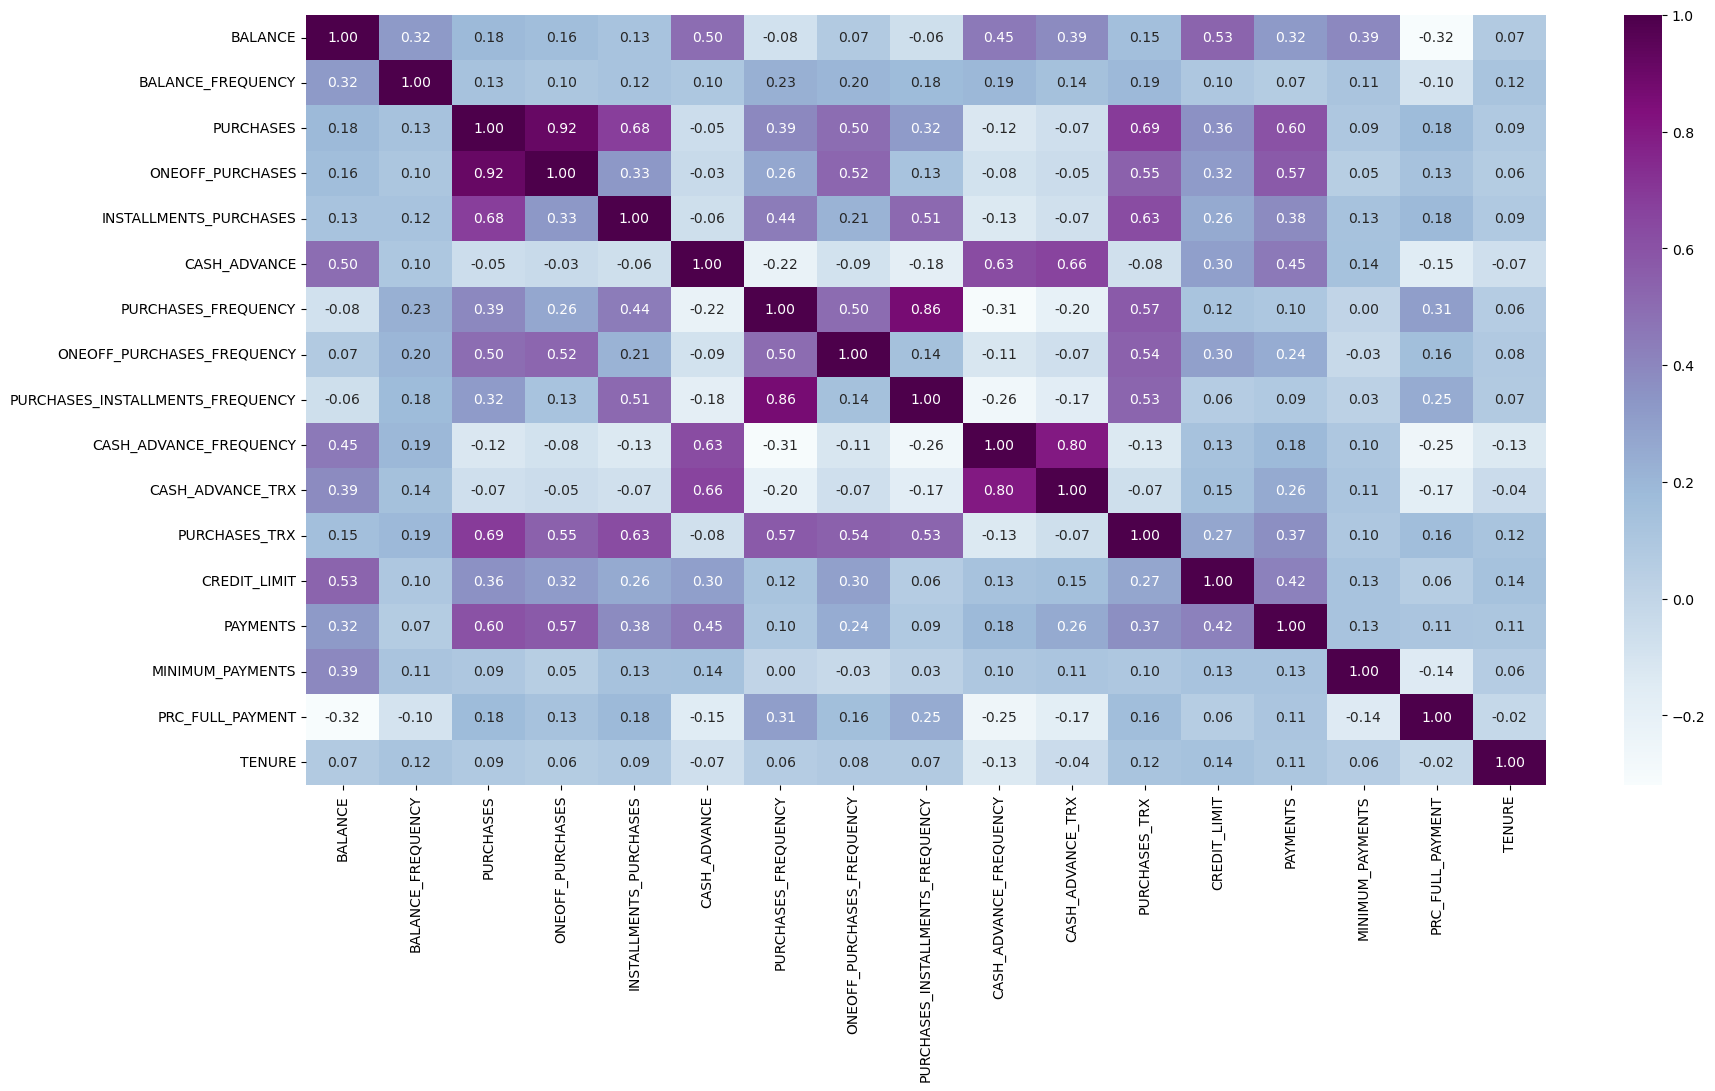

In [16]:
# correlation matrix of DataFrame

plt.figure(figsize=(20,10))
corn=creditcard_df.corr()
sns.heatmap(corn,annot=True,cmap="BuPu",fmt='.2f')

## From the results, we can see 3 pairs of strong correlation
1. "PURCHASES" and "ONEOFF_PURCHASES" -- 0.92
2. "PURCHASES_FREQUENCY" and 'PURCHASES_INSTALLMENT_FREQUENCY' --0.86
3. "CASH_ADVANCE_TRX" and "CASH_ADVANCE_FREQUENCY" --0.80

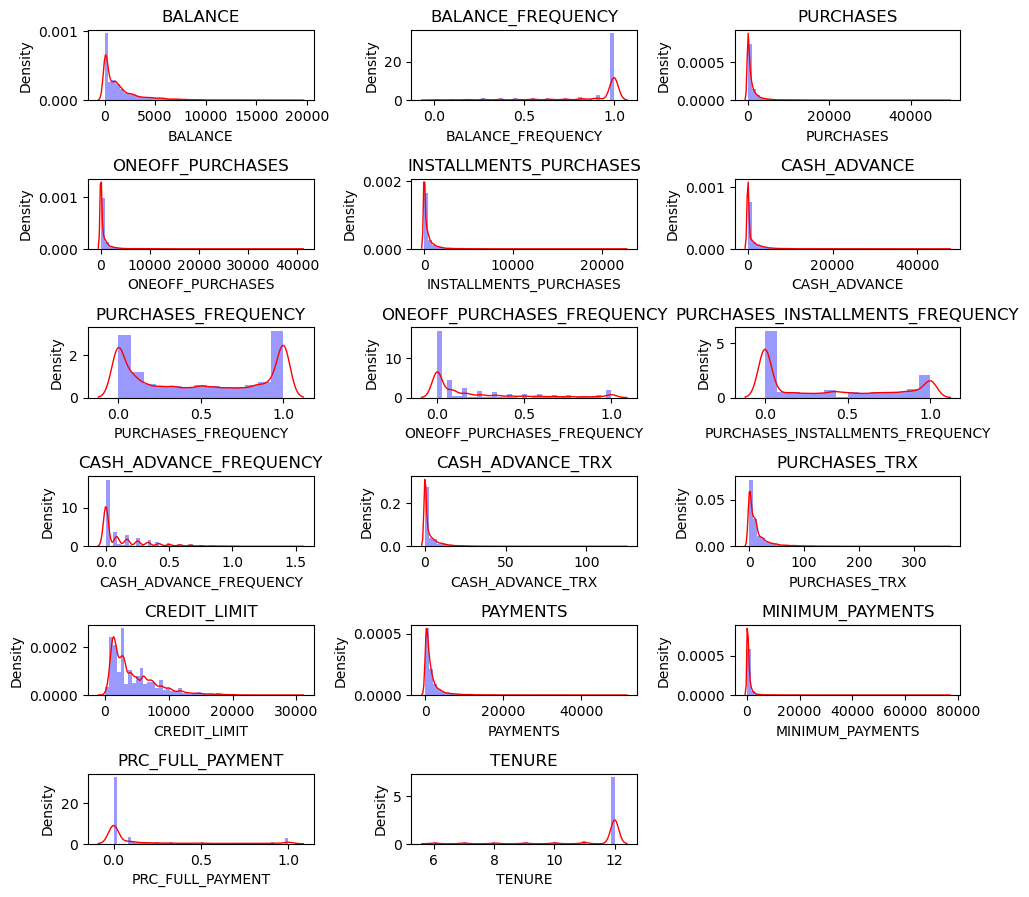

In [17]:
plt.figure(figsize=(10,25))
for i in range(0,17):
    plt.subplot(17,3,i+1)
    sns.distplot(creditcard_df[creditcard_df.columns[i]],kde_kws={'color':'r','bw': 0.1,'lw':1,'label':'KDE'},hist_kws={'color':'b'})
    plt.title(creditcard_df.columns[i])
plt.tight_layout()

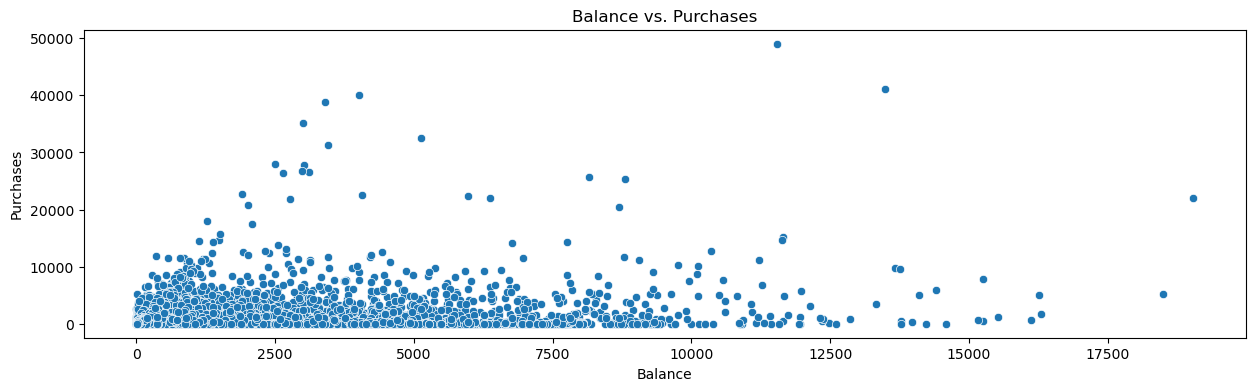

In [18]:
# Scatter plots for selected pairs of features
plt.figure(figsize=(15, 4))
sns.scatterplot(data=creditcard_df, x='BALANCE', y='PURCHASES')
plt.title('Balance vs. Purchases')
plt.xlabel('Balance')
plt.ylabel('Purchases')
plt.show()


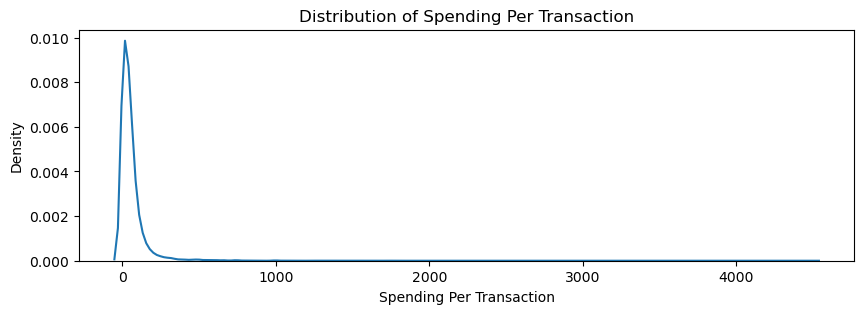

In [19]:
# Create a new feature - Spending per Transaction
creditcard_df['SPENDING_PER_TRX'] = creditcard_df['PURCHASES'] / (creditcard_df['PURCHASES_TRX'] + 1)

# Visualize the new feature
plt.figure(figsize=(10, 3))
sns.kdeplot(creditcard_df['SPENDING_PER_TRX'])
plt.title('Distribution of Spending Per Transaction')
plt.xlabel('Spending Per Transaction')
plt.show()


# **6. Scaling the data**

In [20]:
# scale the DataFrame
scalar=StandardScaler()
creditcard_scaled_df = scalar.fit_transform(creditcard_df)

In [21]:
creditcard_scaled_df

array([[-0.73198937, -0.24943448, -0.42489974, ..., -0.52555097,
         0.36067954, -0.24576149],
       [ 0.78696085,  0.13432467, -0.46955188, ...,  0.2342269 ,
         0.36067954, -0.54258224],
       [ 0.44713513,  0.51808382, -0.10766823, ..., -0.52555097,
         0.36067954,  0.01255297],
       ...,
       [-0.7403981 , -0.18547673, -0.40196519, ...,  0.32919999,
        -4.12276757, -0.31794431],
       [-0.74517423, -0.18547673, -0.46955188, ...,  0.32919999,
        -4.12276757, -0.54258224],
       [-0.57257511, -0.88903307,  0.04214581, ..., -0.52555097,
        -4.12276757, -0.11739974]])

# **7. Dimensionality reduction**

In [22]:
# convert the DataFrame into 2D DataFrame for visualization
pca = PCA(n_components=2)
principal_comp = pca.fit_transform(creditcard_scaled_df)
pca_df = pd.DataFrame(data=principal_comp,columns=["pca1","pca2"])
pca_df.head()

,pca1,pca2
0,-1.689121,-1.076864
1,-1.200137,2.506429
2,0.960482,-0.383242
3,0.135692,0.038668
4,-1.642176,-0.688821


# **8. Hyperparameter tuning**

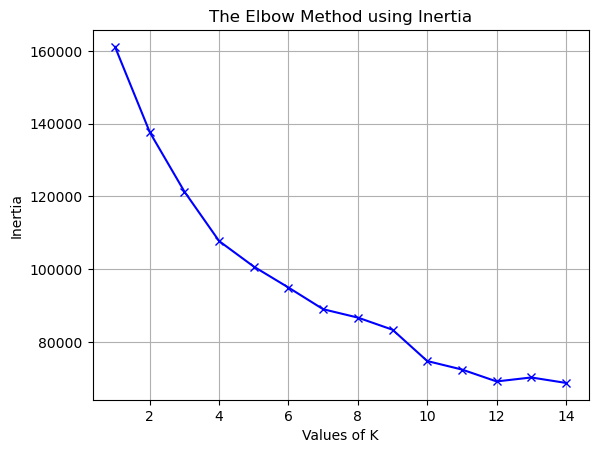

In [23]:
# find 'k' value by Elbow Method
inertia = []
range_val = range(1,15)
for i in range_val:
  kmean = KMeans(n_clusters=i)
  kmean.fit_predict(pd.DataFrame(creditcard_scaled_df))
  inertia.append(kmean.inertia_)

#plt.figure(figsize=(5, 5))
plt.plot(range_val,inertia,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Inertia') 
plt.title('The Elbow Method using Inertia') 
plt.grid(True)
plt.show()

From this plot, 4th cluster seems to be the elbow of the curve.
However, the values does not reduce to linearly until 8th cluster, so we may consider using 8 clusters in this case.

# **9. Model Building**

## ** K-Means Clustering**

In [24]:
# apply kmeans algorithm
kmeans_model=KMeans(4)
kmeans_model.fit_predict(creditcard_scaled_df)
pca_df_kmeans= pd.concat([pca_df,pd.DataFrame({'cluster':kmeans_model.labels_})],axis=1)

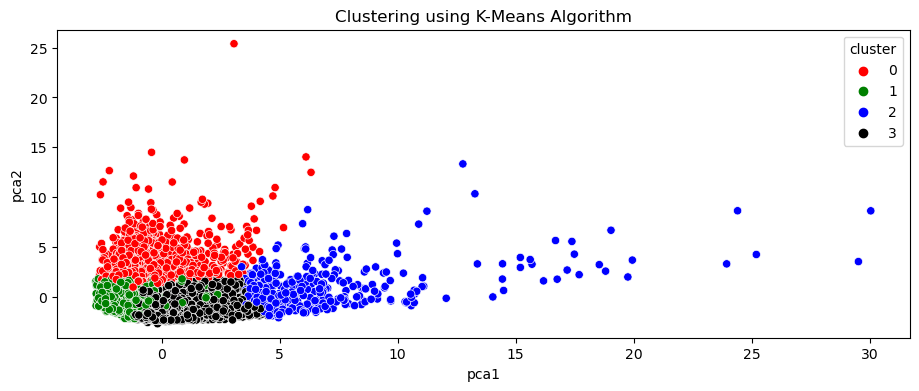

In [25]:
# visualize the clustered dataframe
# Scatter Plot
plt.figure(figsize=(11,4))
#palette=['dodgerblue','red','green','blue','black','pink','gray','purple','coolwarm']
ax=sns.scatterplot(x="pca1",y="pca2",hue="cluster",data=pca_df_kmeans,palette=['red','green','blue','black'])
plt.title("Clustering using K-Means Algorithm")
plt.show()

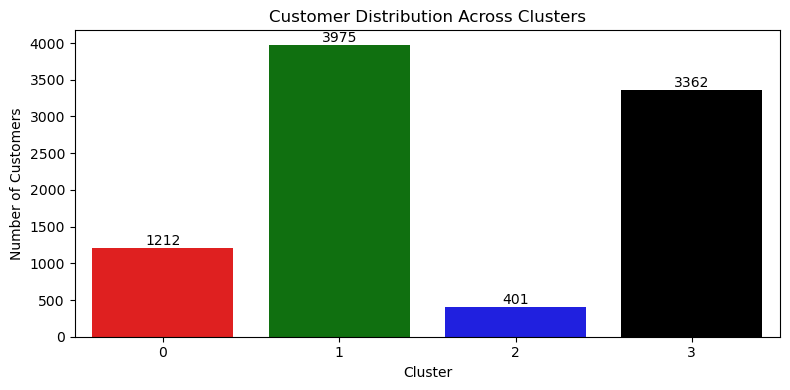

In [26]:
plt.figure(figsize=(8, 4))
ax=sns.countplot(x='cluster', data=pca_df_kmeans, palette=['red', 'green', 'blue', 'black'])
plt.xlabel('Cluster')
plt.ylabel('Number of Customers')
plt.title('Customer Distribution Across Clusters')

for bars in ax.containers:
    ax.bar_label(bars)
    
plt.tight_layout()  
plt.show()

- Cluster 1 has highest customer number of database

## **9.1. Analyzing Clustering Output**

We've used K-Means model for clustering in this dataset.

In [27]:
kmeans_model.cluster_centers_.shape                                

(4, 18)

In [28]:
# find all cluster centers

cluster_centers = pd.DataFrame(data=kmeans_model.cluster_centers_,columns=[creditcard_df.columns])

# inverse transfor the data
cluster_centers = scalar.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data=cluster_centers,columns=[creditcard_df.columns])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,SPENDING_PER_TRX
0,4564.405475,0.968406,479.259678,300.891947,178.451617,4486.258218,0.282620,0.135816,0.182273,0.484418,14.229373,7.495875,7475.210021,3453.290360,1984.369830,0.035370,11.386139,39.923164
1,1004.485967,0.788897,272.906691,211.451359,61.722489,586.820975,0.172774,0.086746,0.082615,0.112967,2.083040,2.944389,3274.672316,961.747758,586.734976,0.078293,11.444892,54.747064
2,3597.849903,0.984491,7783.819002,5185.878204,2599.437057,687.223253,0.942647,0.734864,0.781754,0.072089,2.167082,89.104738,9741.895262,7457.561072,2001.903217,0.286435,11.940150,149.008789
3,902.594478,0.936071,1246.499530,599.996601,646.777470,212.889806,0.886559,0.299726,0.713352,0.042994,0.798097,22.341957,4235.896596,1342.189111,652.733969,0.269664,11.599762,57.852220


In [29]:
# create a column as "cluster" & store the respective cluster name that they belongs to
creditcard_cluster_df = pd.concat([creditcard_df,pd.DataFrame({'cluster':kmeans_model.labels_})],axis=1)
creditcard_cluster_df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,SPENDING_PER_TRX,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,31.800000,1
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,0.000000,0
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,59.474615,3
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,749.500000,1
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,8.000000,1


## **9.3. Analysis of each Cluster**

### Cluster - 1

In [30]:
cluster_1_df = creditcard_cluster_df[creditcard_cluster_df["cluster"]==0]
cluster_1_df.sort_values(by=['BALANCE'], ascending=False).head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,SPENDING_PER_TRX,cluster
5488,16304.88925,1.0,1770.57,0.00,1770.57,7424.094447,0.500000,0.000000,0.416667,0.666667,13,9,19000.0,5337.961195,8345.641905,0.0,12,177.057000,0
5281,16115.59640,1.0,684.74,105.30,579.44,4354.002428,1.000000,0.083333,1.000000,0.583333,15,15,18000.0,3546.061550,5743.736444,0.0,12,42.796250,0
2361,15532.33972,1.0,1168.75,0.00,1168.75,3183.037625,0.916667,0.000000,0.916667,0.250000,5,11,16500.0,3906.738592,3379.593046,0.0,12,97.395833,0
520,15258.22590,1.0,529.30,529.30,0.00,4100.891579,0.500000,0.500000,0.000000,1.000000,23,10,19000.0,2051.146470,3905.740148,0.0,8,48.118182,0
4708,15155.53286,1.0,717.24,717.24,0.00,4718.274895,1.000000,1.000000,0.000000,0.500000,7,24,18000.0,4002.194556,3843.924668,0.0,12,28.689600,0


### Cluster - 2

In [31]:
cluster_2_df = creditcard_cluster_df[creditcard_cluster_df["cluster"]==1]
cluster_2_df.sort_values(by=['BALANCE'], ascending=False).head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,SPENDING_PER_TRX,cluster
1109,8115.039014,1.000000,383.42,0.00,383.42,0.0,0.500000,0.000000,0.416667,0.0,0,7,11000.0,1982.542865,1821.785907,0.0,12,47.927500,1
5005,6963.435383,1.000000,2951.93,2951.93,0.00,0.0,0.333333,0.333333,0.000000,0.0,0,10,8000.0,1069.094662,11142.932240,0.0,12,268.357273,1
1794,6937.806466,1.000000,339.75,0.00,339.75,0.0,0.250000,0.000000,0.250000,0.0,0,3,10500.0,2163.154746,3228.084937,0.0,12,84.937500,1
1262,6619.148640,1.000000,35.92,0.00,35.92,0.0,0.083333,0.000000,0.083333,0.0,0,1,13500.0,2071.643344,1797.588069,0.0,12,17.960000,1
4998,6537.852206,0.909091,2598.51,2422.55,175.96,0.0,0.272727,0.090909,0.272727,0.0,0,26,16000.0,2209.410409,1385.561503,0.0,11,96.241111,1


### Cluster - 3 (Silver)

In [32]:
cluster_3_df = creditcard_cluster_df[creditcard_cluster_df["cluster"]==2]
cluster_3_df.sort_values(by=['BALANCE'], ascending=False).head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,SPENDING_PER_TRX,cluster
138,19043.13856,1.0,22009.92,9449.07,12560.85,0.000000,1.0,0.750000,1.0,0.000000,0,216,18000.0,23018.575830,18621.013310,0.0,12,101.428203,2
4140,18495.55855,1.0,5288.28,3657.30,1630.98,0.000000,1.0,0.583333,1.0,0.000000,0,76,22000.0,4246.168346,4227.081580,0.0,12,68.678961,2
6629,16259.44857,1.0,5024.68,3582.45,1442.23,328.698275,1.0,0.833333,1.0,0.083333,2,143,18000.0,4987.235359,5137.504664,0.0,12,34.893611,2
585,15244.74865,1.0,7823.74,7564.81,258.93,2621.049473,1.0,1.000000,1.0,0.083333,2,62,19000.0,11123.409180,4467.520244,0.0,12,124.186349,2
643,14411.95798,1.0,5958.17,3161.46,2796.71,0.000000,1.0,0.583333,1.0,0.000000,0,98,15000.0,7839.750264,8096.795020,0.0,12,60.183535,2


### Cluster - 4

In [33]:
cluster_4_df = creditcard_cluster_df[creditcard_cluster_df["cluster"] == 3]
cluster_4_df.sort_values(by=['BALANCE'], ascending=False).head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,SPENDING_PER_TRX,cluster
1772,9502.256762,1.0,2776.09,1424.05,1352.04,0.000000,0.916667,0.583333,0.916667,0.000000,0,36,10500.0,4177.324826,4264.641552,0.0,12,75.029459,3
5460,8978.156324,1.0,482.88,325.52,157.36,72.443790,0.750000,0.500000,0.750000,0.083333,1,15,9500.0,2112.619409,5817.079142,0.0,12,30.180000,3
1845,8099.879299,1.0,2352.00,1161.47,1190.53,389.680166,1.000000,0.833333,1.000000,0.250000,4,50,12500.0,1863.944131,1830.532435,0.0,12,46.117647,3
4584,7789.190958,1.0,1307.39,84.45,1222.94,1836.893684,1.000000,0.166667,1.000000,0.250000,3,66,8500.0,2072.817061,2983.977594,0.0,12,19.513284,3
4651,6991.964344,1.0,1384.92,0.00,1384.92,18.807602,0.750000,0.000000,0.666667,0.083333,1,9,13000.0,2814.595080,2308.020257,0.0,12,138.492000,3


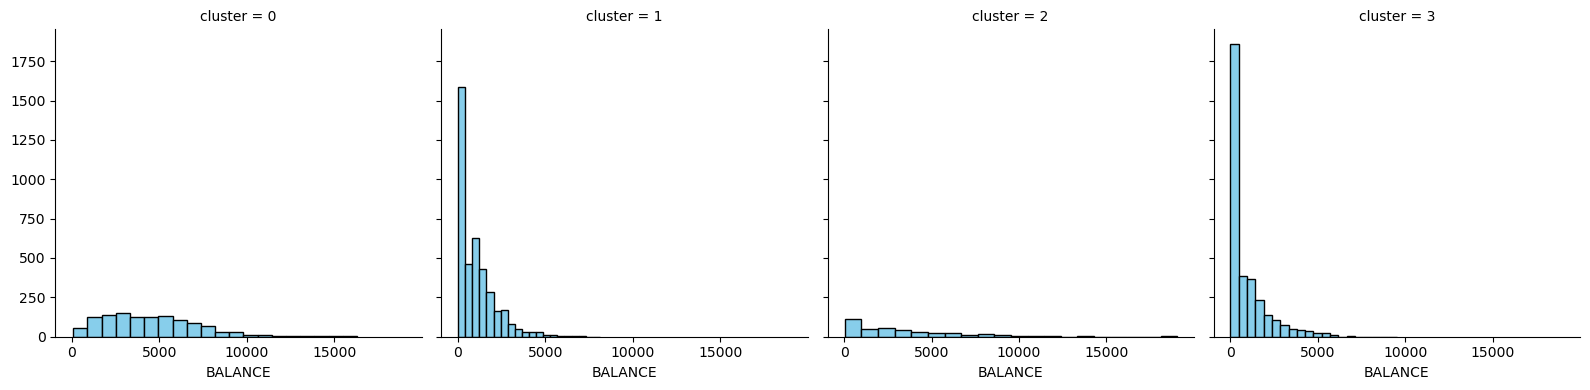

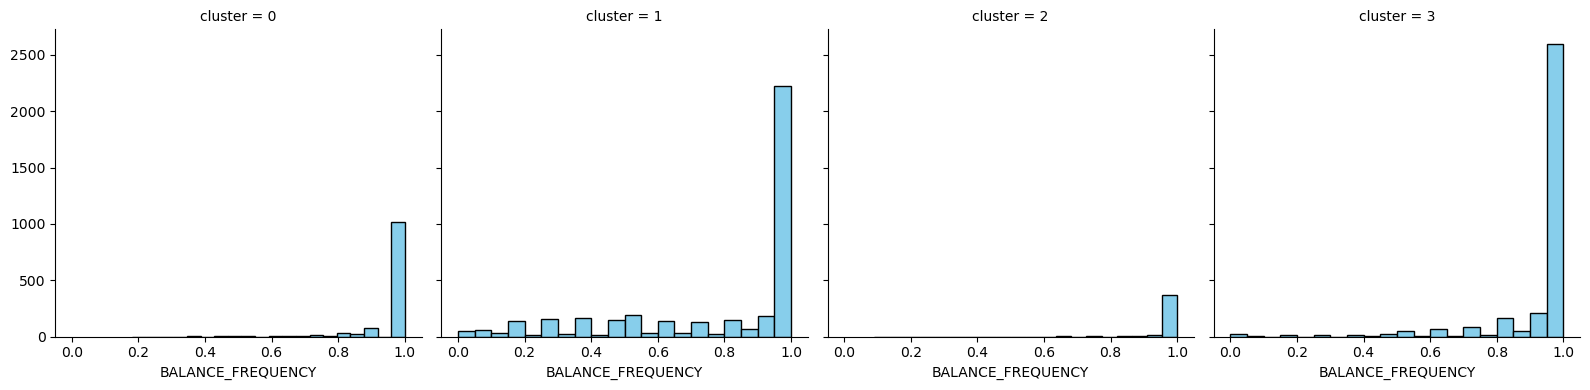

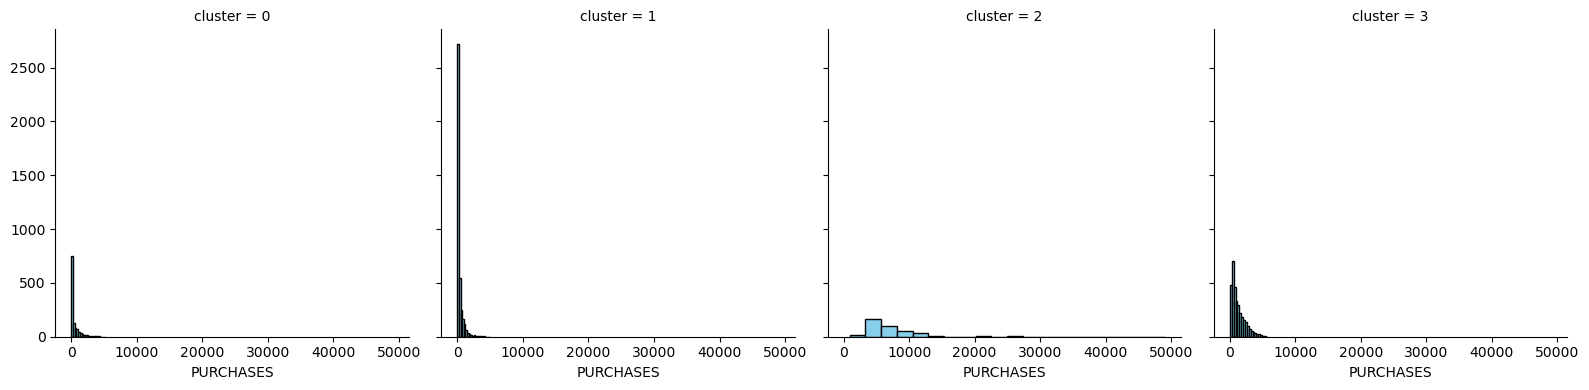

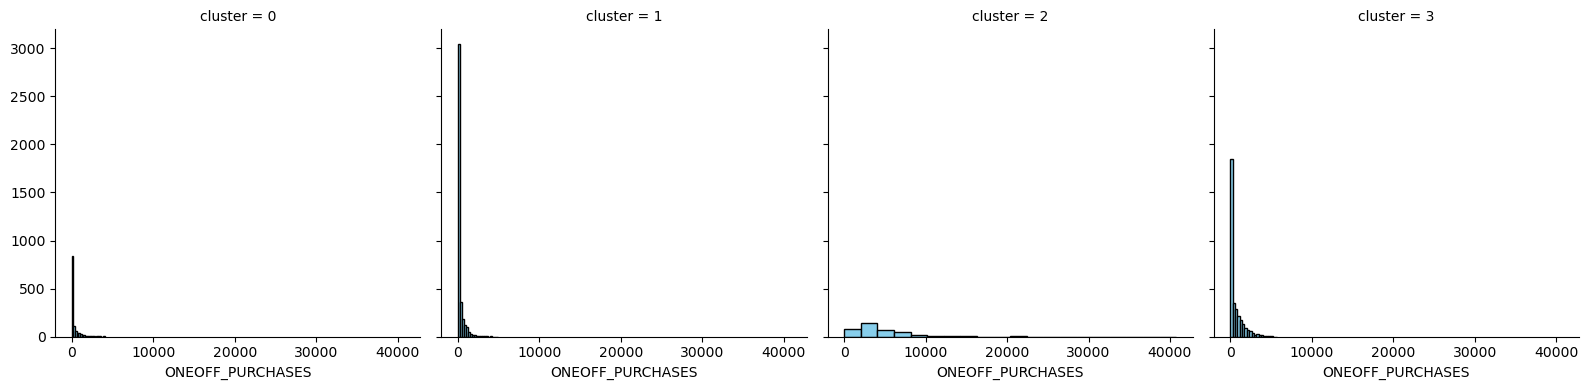

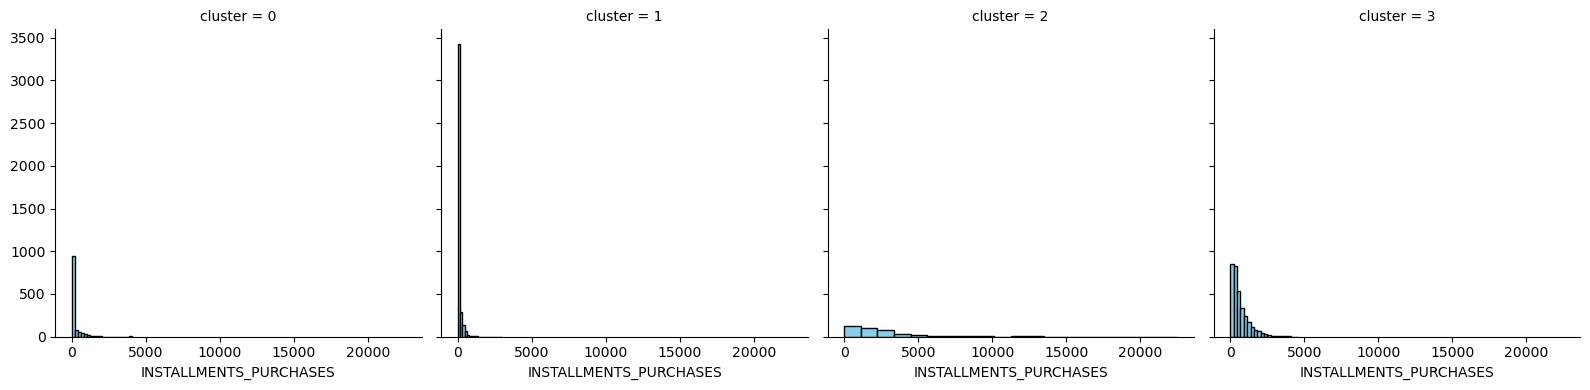

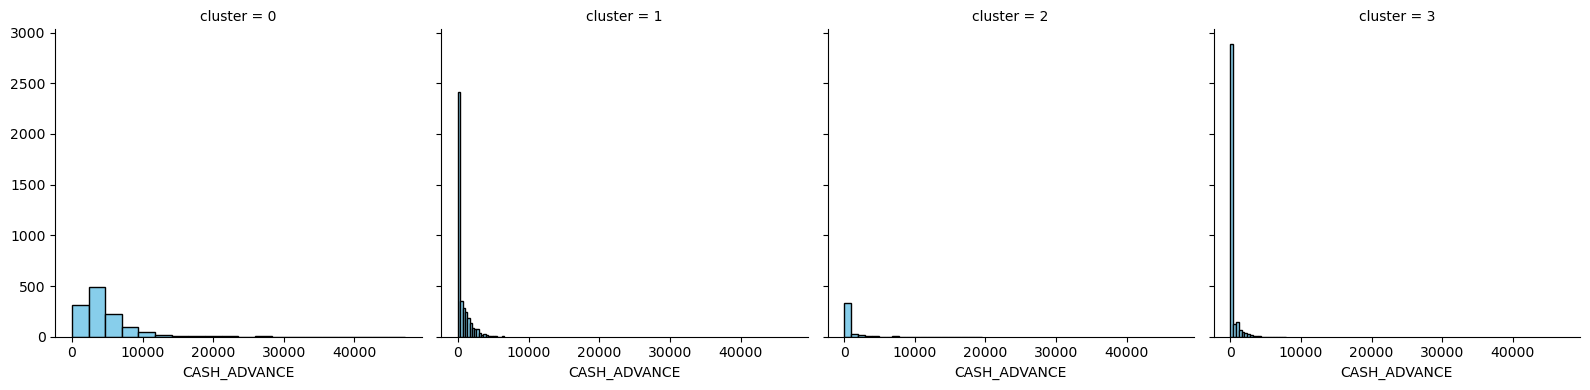

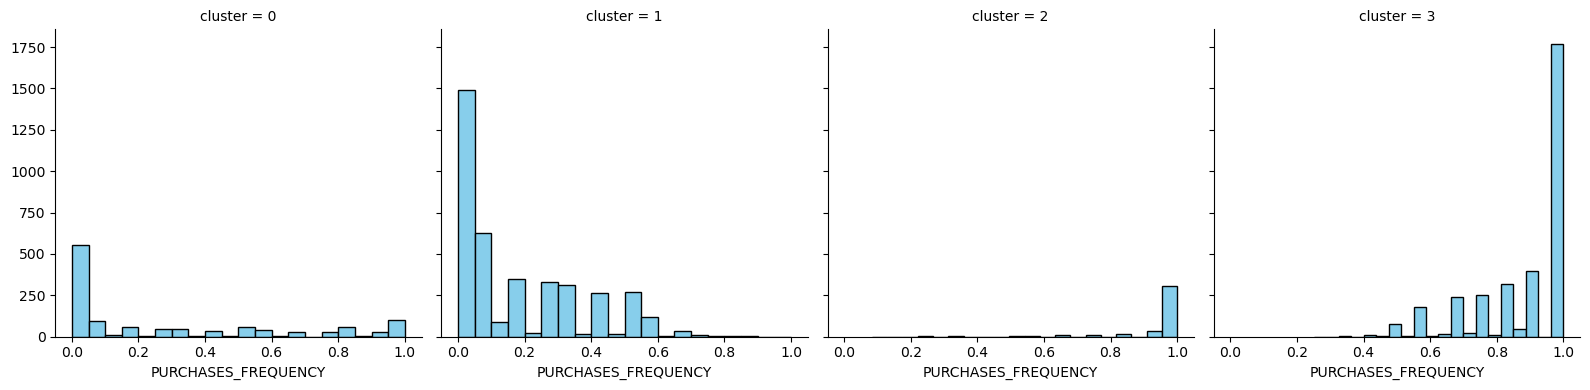

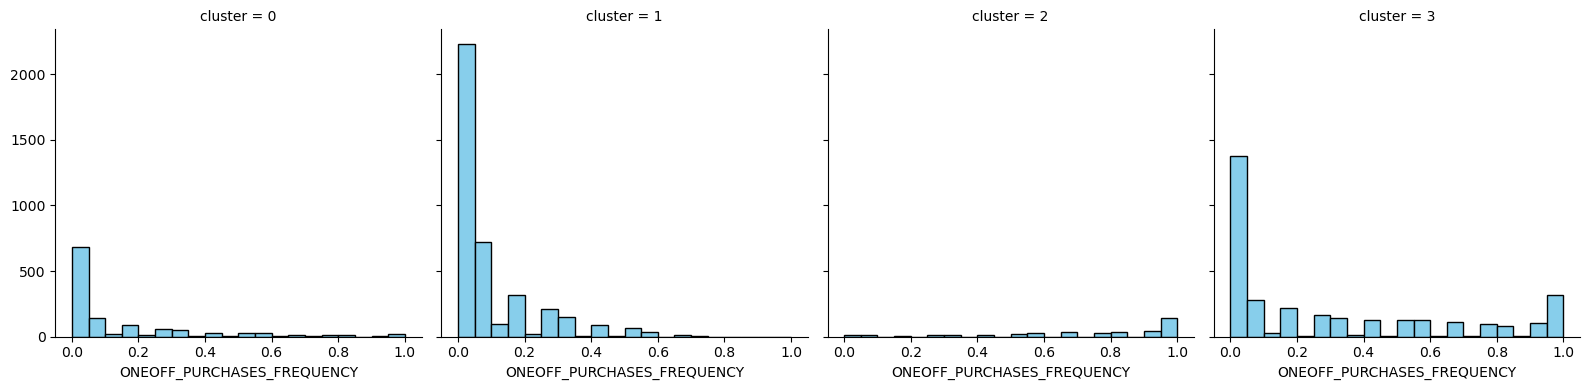

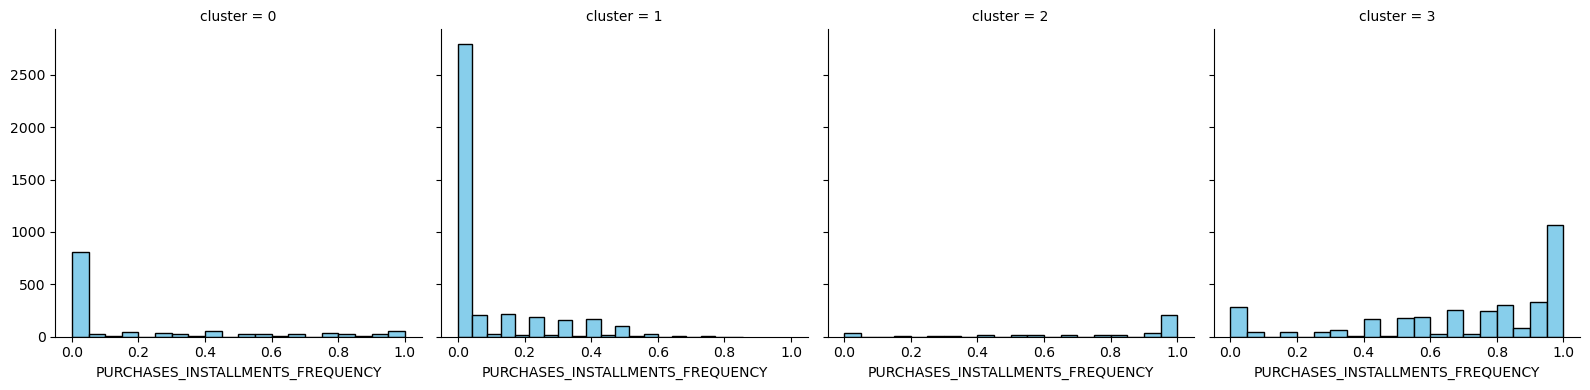

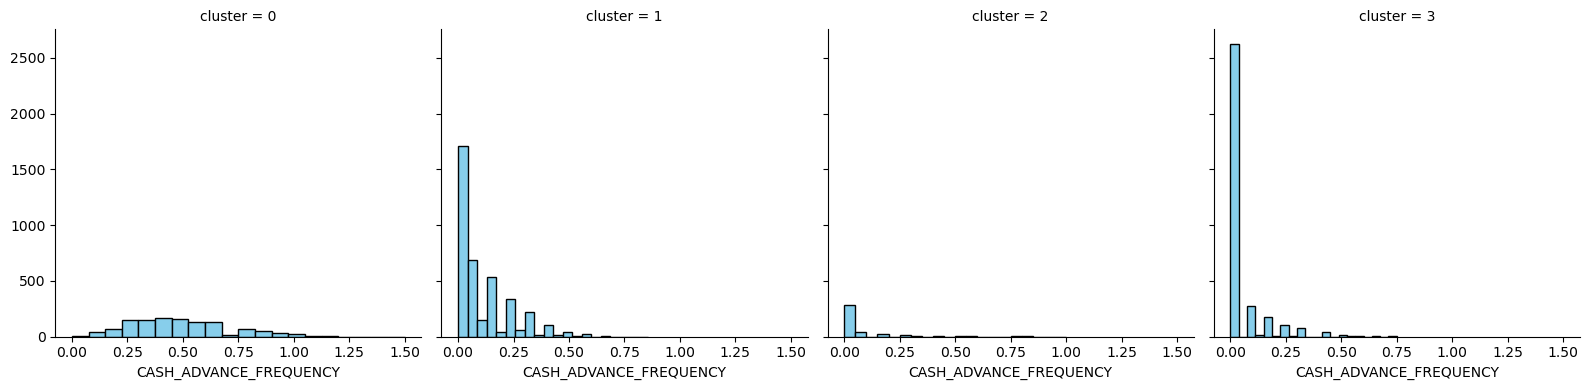

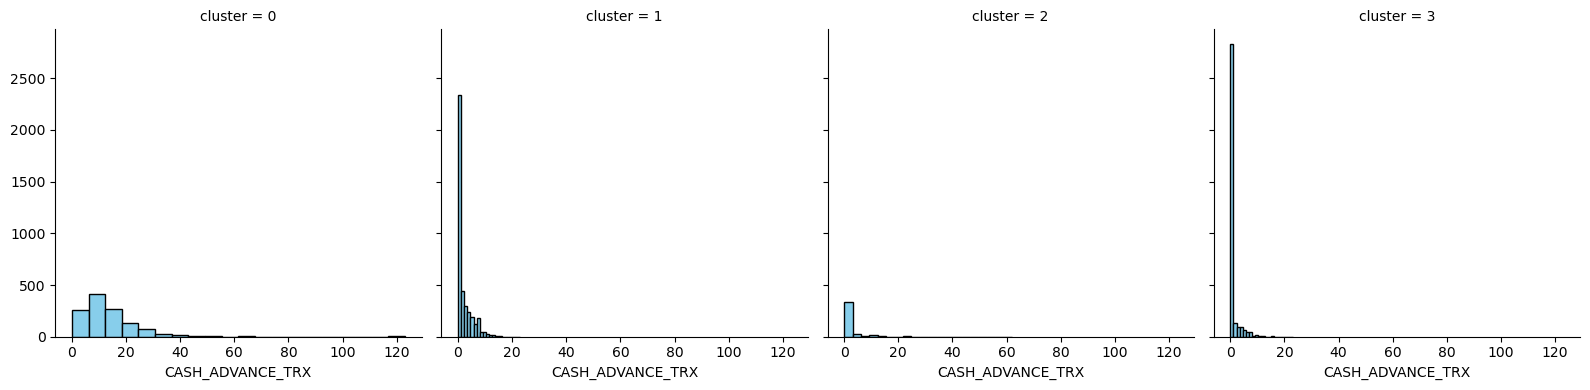

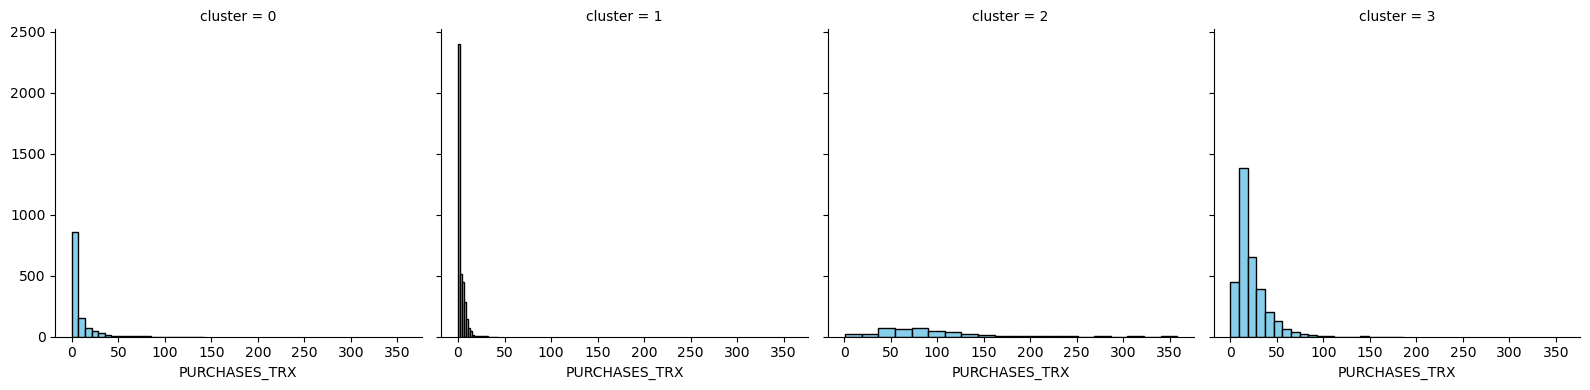

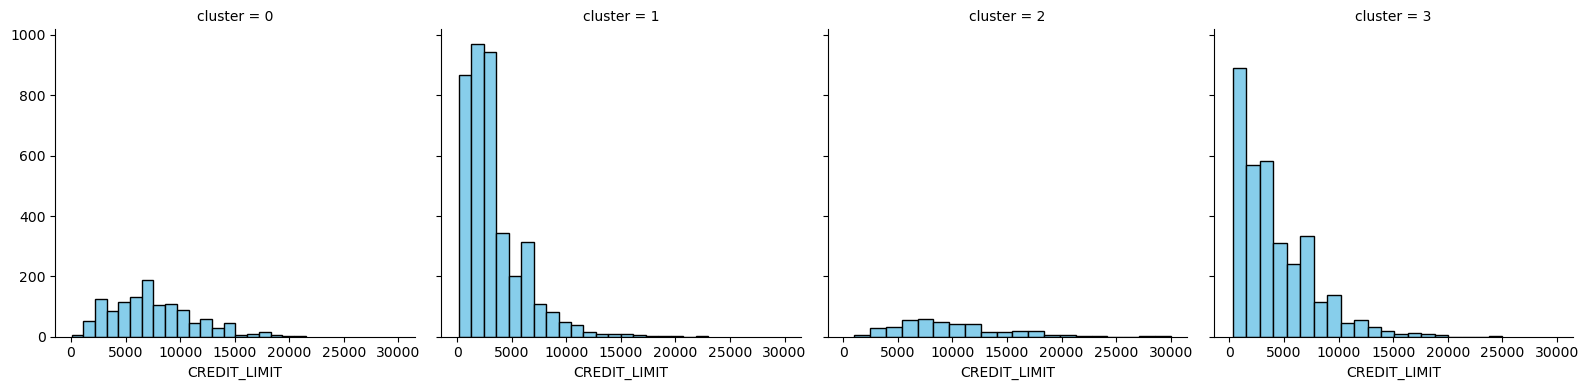

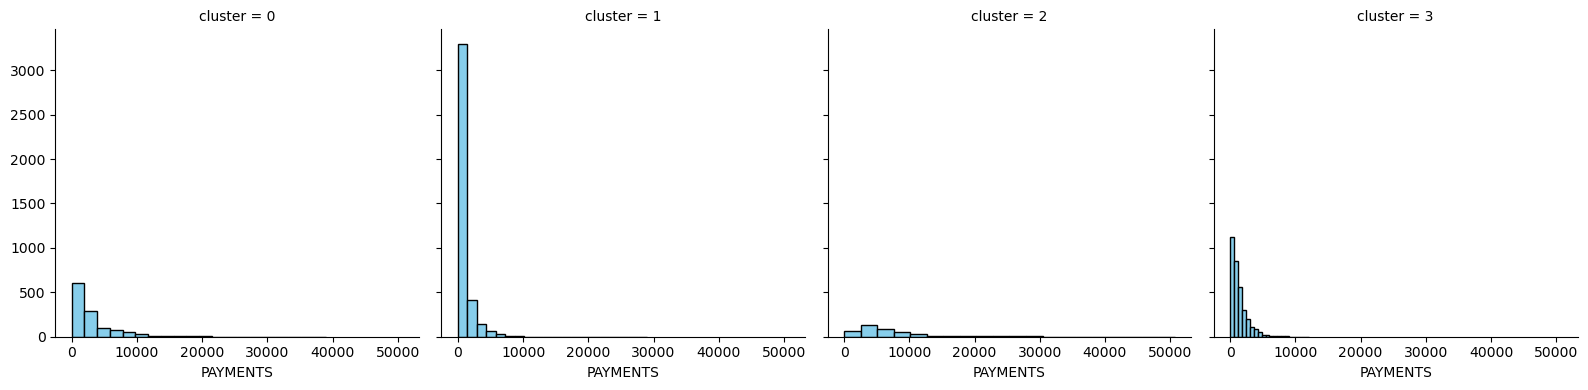

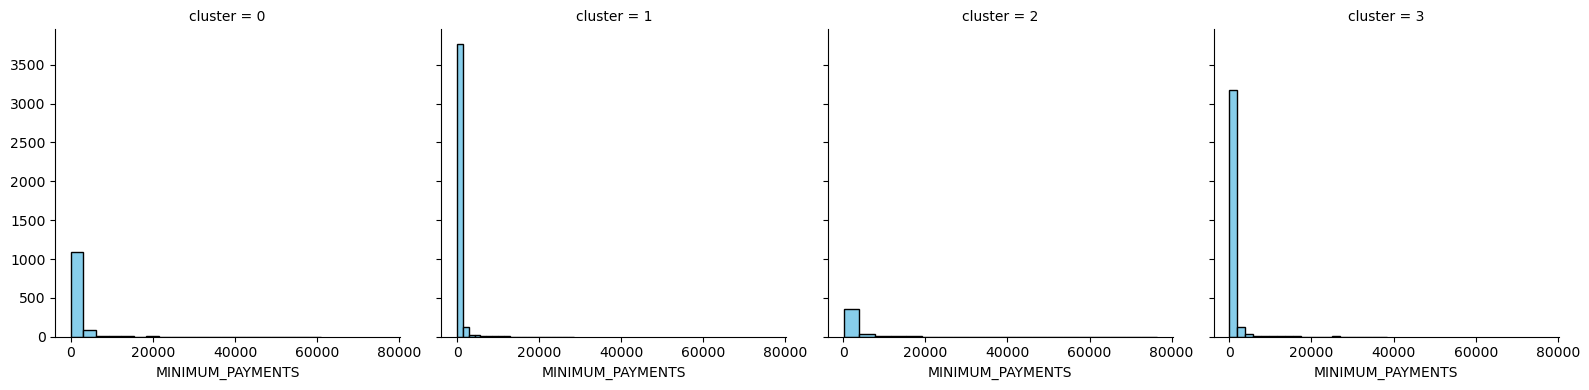

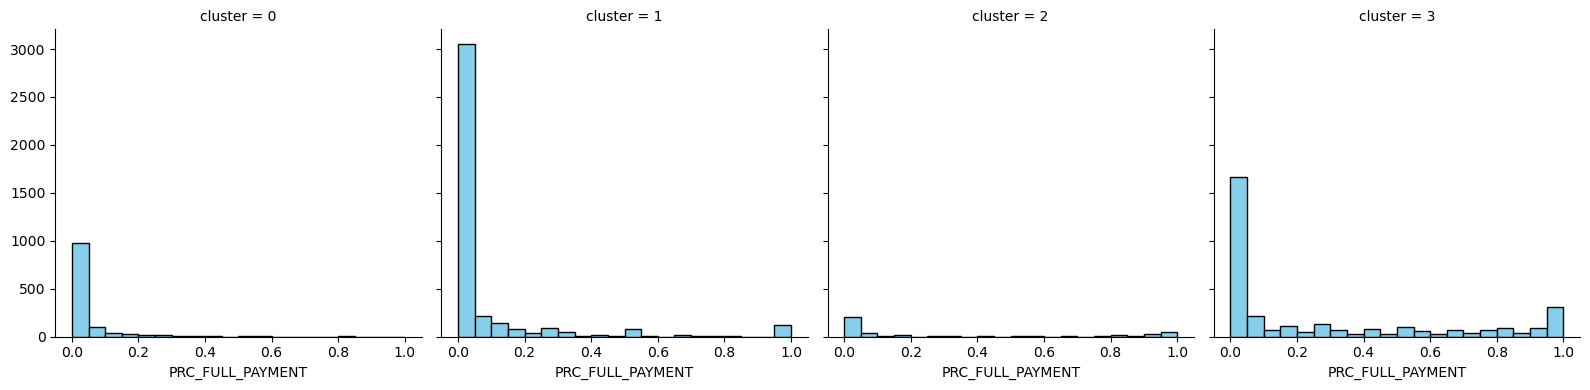

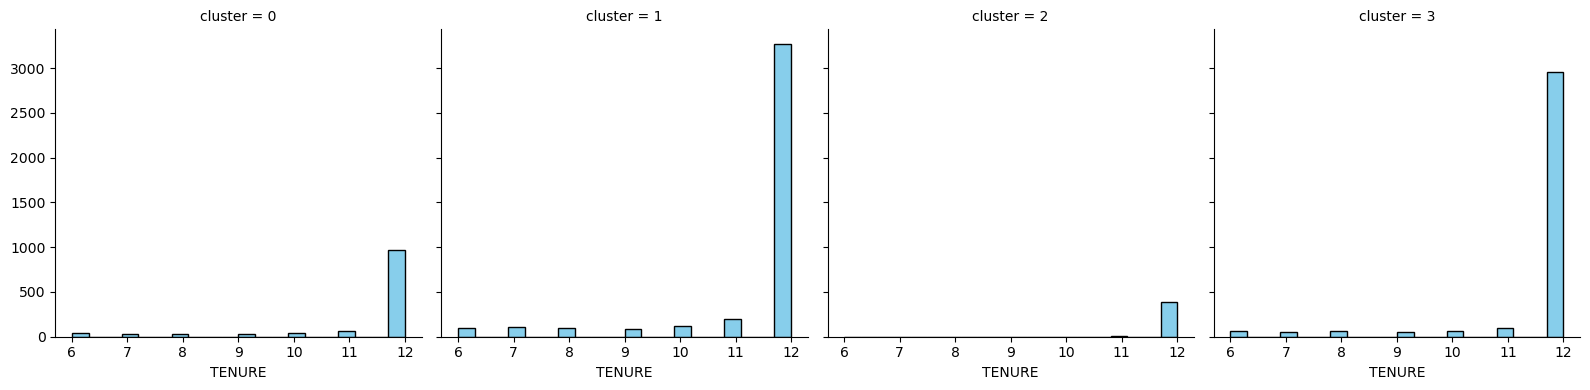

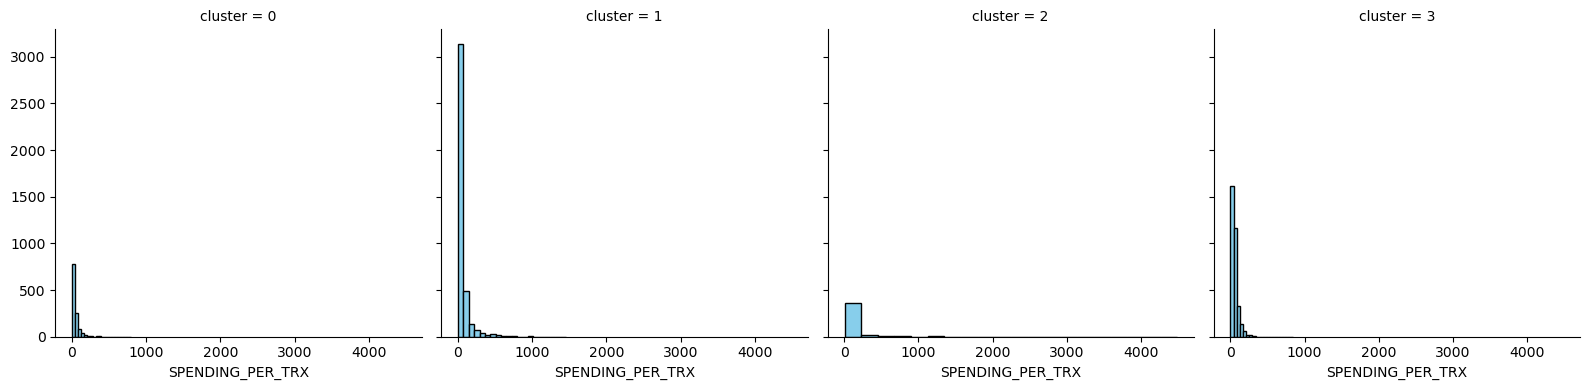

In [34]:

# Loop through each numeric column, skipping the 'cluster' column
for c in creditcard_cluster_df.drop(['cluster'], axis=1).columns:
    
    grid = sns.FacetGrid(creditcard_cluster_df, col='cluster', col_wrap=4, height=4)
    
    grid = grid.map(plt.hist, c, bins=20, color='skyblue', edgecolor='black')
    
# Show the plots
plt.tight_layout()
plt.show()


# **10. Save The Model**

- *Unsupervise model has been converted into Supervise model*

In [35]:
#Saving Scikitlearn models
import joblib
joblib.dump(kmeans_model, "E:\CodeBasic\kmeans_model.pkl")

['E:\\CodeBasic\\kmeans_model.pkl']

In [36]:
# save the dataframe in .csv file named as "Clustered_Costumer_Data"
creditcard_cluster_df.to_csv("E:\CodeBasic\Clustered_Customer_Data1.csv")

# **10.  Modelling**

In [37]:
creditcard_cluster_df.isnull().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
SPENDING_PER_TRX                    0
cluster                             0
dtype: int64

In [38]:
creditcard_cluster_df.duplicated().sum()

0

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn import tree
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier

In [40]:

X = creditcard_cluster_df.drop(['cluster'], axis=1)  
y = creditcard_cluster_df['cluster'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)  # Set a random_state for reproducibility


print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (6265, 18)
X_test shape: (2685, 18)
y_train shape: (6265,)
y_test shape: (2685,)


In [41]:
for i in range(1, 20):
    dt2 = DecisionTreeClassifier(max_depth=i, random_state=42)
    
    dt2.fit(X_train, y_train)
    print(f"Max Depth: {i}, Training Accuracy: {dt2.score(X_train, y_train):.2f}, Test Accuracy: {dt2.score(X_test, y_test):.2f}")


Max Depth: 1, Training Accuracy: 0.79, Test Accuracy: 0.79
Max Depth: 2, Training Accuracy: 0.87, Test Accuracy: 0.87
Max Depth: 3, Training Accuracy: 0.90, Test Accuracy: 0.90
Max Depth: 4, Training Accuracy: 0.92, Test Accuracy: 0.92
Max Depth: 5, Training Accuracy: 0.93, Test Accuracy: 0.92
Max Depth: 6, Training Accuracy: 0.95, Test Accuracy: 0.93
Max Depth: 7, Training Accuracy: 0.96, Test Accuracy: 0.94
Max Depth: 8, Training Accuracy: 0.97, Test Accuracy: 0.94
Max Depth: 9, Training Accuracy: 0.98, Test Accuracy: 0.93
Max Depth: 10, Training Accuracy: 0.99, Test Accuracy: 0.93
Max Depth: 11, Training Accuracy: 0.99, Test Accuracy: 0.94
Max Depth: 12, Training Accuracy: 0.99, Test Accuracy: 0.94
Max Depth: 13, Training Accuracy: 1.00, Test Accuracy: 0.94
Max Depth: 14, Training Accuracy: 1.00, Test Accuracy: 0.93
Max Depth: 15, Training Accuracy: 1.00, Test Accuracy: 0.93
Max Depth: 16, Training Accuracy: 1.00, Test Accuracy: 0.94
Max Depth: 17, Training Accuracy: 1.00, Test Accu

In [42]:
model = DecisionTreeClassifier(criterion="gini", 
                               max_depth=4, 
                               min_samples_split=4, 
                               min_samples_leaf=2, 
                               random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


In [43]:
#Confusion_Matrix
print(metrics.confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 289   45    1   18]
 [  39 1117    0   47]
 [   2    8   94   22]
 [  17   23    1  962]]
              precision    recall  f1-score   support

           0       0.83      0.82      0.83       353
           1       0.94      0.93      0.93      1203
           2       0.98      0.75      0.85       126
           3       0.92      0.96      0.94      1003

    accuracy                           0.92      2685
   macro avg       0.92      0.86      0.89      2685
weighted avg       0.92      0.92      0.92      2685



In [44]:
import pickle
filename = 'final_model.sav'
pickle.dump(model, open(filename, 'wb'))
 

In [45]:
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)*100
print(result,'% Testing Acuuracy')

91.69459962756052 % Testing Acuuracy


In [46]:
result = loaded_model.score(X_train, y_train)*100
print(result,'% Training Acuuracy')

91.8754988028731 % Training Acuuracy
